In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# -------------------------------
# 1. Read Q4 datasets for years 2020–2024
# -------------------------------
base_dir = "/content/drive/My Drive/datasets"
years = range(2015, 2025)
quarter = "Q4"

all_drug_dfs = []
all_demo_dfs = []
all_reac_dfs = []
all_indi_dfs = []

def extract_year_quarter(folder_name):
    """Extract year and quarter from folder name, e.g., 'faers_2020Q4'"""
    match = re.search(r'faers_(\d{4})(Q\d)', folder_name)
    if match:
        return int(match.group(1)), match.group(2)
    return None, None

for year in years:
    folder_name = f"faers_{year}{quarter}"
    folder_path = os.path.join(base_dir, folder_name)
    if not os.path.isdir(folder_path):
        print(f"Folder not found: {folder_path}")
        continue

    y, q_label = extract_year_quarter(folder_name)
    year_str = str(year)[2:]  # e.g., "20" for 2020

    drug_file = os.path.join(folder_path, f"DRUG{year_str}{quarter}.txt")
    demo_file = os.path.join(folder_path, f"DEMO{year_str}{quarter}.txt")
    reac_file = os.path.join(folder_path, f"REAC{year_str}{quarter}.txt")
    indi_file = os.path.join(folder_path, f"INDI{year_str}{quarter}.txt")

    if os.path.isfile(drug_file):
        df_drug = pd.read_csv(drug_file, sep='$', low_memory=False)
        df_drug['year'] = y
        df_drug['quarter'] = q_label
        all_drug_dfs.append(df_drug)
        print(f"Loaded {drug_file} with shape {df_drug.shape}")
    else:
        print(f"File not found: {drug_file}")

    if os.path.isfile(demo_file):
        df_demo = pd.read_csv(demo_file, sep='$', low_memory=False)
        df_demo['year'] = y
        df_demo['quarter'] = q_label
        all_demo_dfs.append(df_demo)
        print(f"Loaded {demo_file} with shape {df_demo.shape}")
    else:
        print(f"File not found: {demo_file}")

    if os.path.isfile(reac_file):
        df_reac = pd.read_csv(reac_file, sep='$', low_memory=False)
        df_reac['year'] = y
        df_reac['quarter'] = q_label
        all_reac_dfs.append(df_reac)
        print(f"Loaded {reac_file} with shape {df_reac.shape}")
    else:
        print(f"File not found: {reac_file}")

    if os.path.isfile(indi_file):
        df_indi = pd.read_csv(indi_file, sep='$', low_memory=False)
        df_indi['year'] = y
        df_indi['quarter'] = q_label
        all_indi_dfs.append(df_indi)
        print(f"Loaded {indi_file} with shape {df_indi.shape}")
    else:
        print(f"File not found: {indi_file}")

# Concatenate data for each type
drug_df = pd.concat(all_drug_dfs, ignore_index=True) if all_drug_dfs else pd.DataFrame()
demo_df = pd.concat(all_demo_dfs, ignore_index=True) if all_demo_dfs else pd.DataFrame()
reac_df = pd.concat(all_reac_dfs, ignore_index=True) if all_reac_dfs else pd.DataFrame()
indi_df = pd.concat(all_indi_dfs, ignore_index=True) if all_indi_dfs else pd.DataFrame()

print("Combined drug_df shape:", drug_df.shape)
print("Combined demo_df shape:", demo_df.shape)
print("Combined reac_df shape:", reac_df.shape)
print("Combined indi_df shape:", indi_df.shape)

Mounted at /content/drive
Loaded /content/drive/My Drive/datasets/faers_2015Q4/DRUG15Q4.txt with shape (1064332, 22)
Loaded /content/drive/My Drive/datasets/faers_2015Q4/DEMO15Q4.txt with shape (314704, 27)
Loaded /content/drive/My Drive/datasets/faers_2015Q4/REAC15Q4.txt with shape (968664, 6)
Loaded /content/drive/My Drive/datasets/faers_2015Q4/INDI15Q4.txt with shape (718340, 6)
Loaded /content/drive/My Drive/datasets/faers_2016Q4/DRUG16Q4.txt with shape (1147547, 22)
Loaded /content/drive/My Drive/datasets/faers_2016Q4/DEMO16Q4.txt with shape (309534, 27)
Loaded /content/drive/My Drive/datasets/faers_2016Q4/REAC16Q4.txt with shape (916308, 6)
Loaded /content/drive/My Drive/datasets/faers_2016Q4/INDI16Q4.txt with shape (755832, 6)
Loaded /content/drive/My Drive/datasets/faers_2017Q4/DRUG17Q4.txt with shape (1213842, 22)
Loaded /content/drive/My Drive/datasets/faers_2017Q4/DEMO17Q4.txt with shape (327848, 27)
Loaded /content/drive/My Drive/datasets/faers_2017Q4/REAC17Q4.txt with shap

In [2]:
print(drug_df.head())
print(demo_df.head())
print(reac_df.head())
print(indi_df.head())

   primaryid    caseid  drug_seq role_cod            drugname  \
0  100035549  10003554         1       PS             GILENYA   
1  100035549  10003554         2        C           BACLOFEN.   
2  100035549  10003554         3        C  INTERFERON BETA-1a   
3  100045052  10004505         1       PS             XALATAN   
4  100045052  10004505         2        C             INSULIN   

                    prod_ai  val_vbm       route                  dose_vbm  \
0  FINGOLIMOD HYDROCHLORIDE        1        Oral                0.5 MG, QD   
1                  BACLOFEN        1     Unknown                       NaN   
2        INTERFERON BETA-1A        1     Unknown                       NaN   
3               LATANOPROST        1  Ophthalmic  1 GTT IN EACH EYE, DAILY   
4               INSULIN NOS        1         NaN                       UNK   

   cum_dose_chr  ... rechal lot_num exp_dt  nda_num dose_amt dose_unit  \
0         214.0  ...      U     NaN    NaN  22527.0      0.5      

In [3]:
# 2. Filter for Prednisolone records and classify them into 5 categories
drug_df['drugname_clean'] = drug_df['drugname'].str.upper().fillna("")
prednisolone_drugs = drug_df[drug_df['drugname_clean'].str.contains("PREDNISOLONE", na=False)]
prednisolone_df = prednisolone_drugs.copy()

def classify_pred_methyl_5cat(drugname):
    """
    Classify drug names into 5 categories:
    1) PREDNISOLONE (base)
    2) PREDNISOLONE_DERIVATIVE
    3) METHYLPREDNISOLONE (base)
    4) METHYLPREDNISOLONE_DERIVATIVE
    5) COMBINATION (if multiple active ingredients are present)
    """
    name = drugname.upper()
    if re.search(r'[\\/;]', name):
        return "COMBINATION"
    if "METHYLPREDNISOLONE" in name:
        if any(x in name for x in ["ACETATE", "PHOSPHATE", "SUCCINATE", "ACEPONATE", "HEMISUCCINATE"]):
            return "METHYLPREDNISOLONE_DERIVATIVE"
        else:
            return "METHYLPREDNISOLONE"
    elif "PREDNISOLONE" in name:
        if any(x in name for x in ["ACETATE", "PHOSPHATE", "STEAGLATE", "VALERATE", "SUCCINATE", "METASULFO", "METAZOATE"]):
            return "PREDNISOLONE_DERIVATIVE"
        else:
            return "PREDNISOLONE"
    else:
        return np.nan

prednisolone_df['major_class_5cat'] = prednisolone_df['drugname_clean'].apply(classify_pred_methyl_5cat)
print("Classification counts (5 categories):")
print(prednisolone_df['major_class_5cat'].value_counts(dropna=False))



Classification counts (5 categories):
major_class_5cat
PREDNISOLONE                     61026
METHYLPREDNISOLONE               37917
METHYLPREDNISOLONE_DERIVATIVE     9258
PREDNISOLONE_DERIVATIVE           3390
COMBINATION                        427
Name: count, dtype: int64


In [4]:
# -------------------------------
# 3. Merge with DEMO, REAC, and INDI datasets based on caseid
# -------------------------------
caseids = prednisolone_df['caseid'].unique()

demo_keep = ['primaryid', 'caseid', 'year', 'quarter', 'age', 'sex']
reac_keep = ['primaryid', 'caseid', 'year', 'quarter', 'pt']
indi_keep = ['primaryid', 'caseid', 'year', 'quarter', 'indi_pt']
pred_keep = ['primaryid', 'caseid', 'year', 'quarter', 'drug_seq', 'role_cod', 'drugname', 'drugname_clean', 'major_class_5cat', 'dechal', 'rechal']


demo_sub = demo_df[demo_df['caseid'].isin(caseids)][demo_keep]
reac_sub = reac_df[reac_df['caseid'].isin(caseids)][reac_keep]
indi_sub = indi_df[indi_df['caseid'].isin(caseids)][indi_keep]
pred_sub = prednisolone_df[pred_keep]

merged_demo_drug = pd.merge(demo_sub, pred_sub, on=['primaryid','caseid','year','quarter'], how='left')
merged_drug_reac = pd.merge(merged_demo_drug, reac_sub, on=['primaryid','caseid','year','quarter'], how='left')
final_merged = pd.merge(merged_drug_reac, indi_sub, on=['primaryid','caseid','year','quarter'], how='left')

print("Final merged DataFrame shape:", final_merged.shape)
print(final_merged.head(10))



Final merged DataFrame shape: (26282376, 15)
    primaryid    caseid  year quarter   age sex  drug_seq role_cod  \
0  1001058218  10010582  2015      Q4  64.0   F       3.0        C   
1  1001058218  10010582  2015      Q4  64.0   F       3.0        C   
2  1001058218  10010582  2015      Q4  64.0   F       3.0        C   
3  1001058218  10010582  2015      Q4  64.0   F       3.0        C   
4  1001058218  10010582  2015      Q4  64.0   F       3.0        C   
5  1001058218  10010582  2015      Q4  64.0   F       3.0        C   
6  1001058218  10010582  2015      Q4  64.0   F       3.0        C   
7  1001058218  10010582  2015      Q4  64.0   F       3.0        C   
8  1001058218  10010582  2015      Q4  64.0   F       3.0        C   
9  1001058218  10010582  2015      Q4  64.0   F       3.0        C   

        drugname drugname_clean major_class_5cat dechal rechal            pt  \
0  PREDNISOLONE.  PREDNISOLONE.     PREDNISOLONE    NaN    NaN    Leukopenia   
1  PREDNISOLONE.  PREDNI

In [5]:
# -------------------------------
# 4. Aggregate records: one row per (year, quarter, caseid)
# -------------------------------
def join_unique(x):
    return "; ".join(sorted(set(x.dropna())))

final_one_row = final_merged.groupby(['year','quarter','caseid'], as_index=False).agg({
    'age': 'first',
    'sex': 'first',
    'drugname_clean': 'first',
    'major_class_5cat': 'first',
    'pt': join_unique,
    'indi_pt': join_unique,
    'dechal': 'first',
    'rechal': 'first'
})

print("Aggregated DataFrame shape:", final_one_row.shape)
print(final_one_row.head(10))

# -------------------------------
# 5. Create additional variable: Age Group
# -------------------------------
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '18-35', '35-50', '50-65', '65+']
final_one_row['age_group'] = pd.cut(final_one_row['age'], bins=bins, labels=labels)

# -------------------------------
# 6. Explode the 'pt' column (adverse events) for detailed mapping
# -------------------------------
# Assume 'pt' is a string with adverse events separated by "; "
final_one_row['pt_list'] = final_one_row['pt'].str.split("; ")
exploded_df = final_one_row.explode('pt_list')



Aggregated DataFrame shape: (72660, 11)
   year quarter   caseid   age sex               drugname_clean  \
0  2015      Q4  6613507  58.0   M                PREDNISOLONE.   
1  2015      Q4  6700674  28.0   M          METHYLPREDNISOLONE.   
2  2015      Q4  7166815  53.0   M  METHYLPREDNISOLONE ACETATE.   
3  2015      Q4  7246767  42.0   F                PREDNISOLONE.   
4  2015      Q4  7317887  40.0   F          METHYLPREDNISOLONE.   
5  2015      Q4  7405141  23.0   F          METHYLPREDNISOLONE.   
6  2015      Q4  7472906  52.0   F          METHYLPREDNISOLONE.   
7  2015      Q4  7599789  48.0   M                PREDNISOLONE.   
8  2015      Q4  7661198  27.0   F          METHYLPREDNISOLONE.   
9  2015      Q4  7694533  54.0   M                PREDNISOLONE.   

                major_class_5cat  \
0                   PREDNISOLONE   
1             METHYLPREDNISOLONE   
2  METHYLPREDNISOLONE_DERIVATIVE   
3                   PREDNISOLONE   
4             METHYLPREDNISOLONE   
5     

<ipython-input-6-6028be72f231>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='report_count', data=yearly_counts, palette="Blues_d")


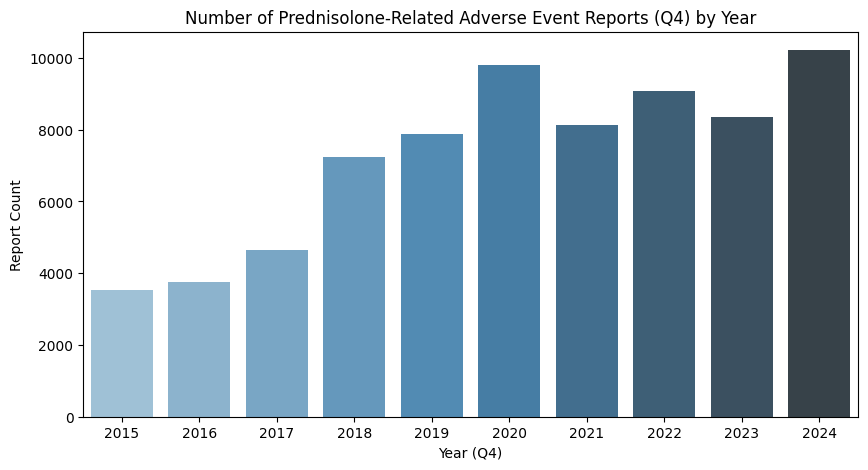

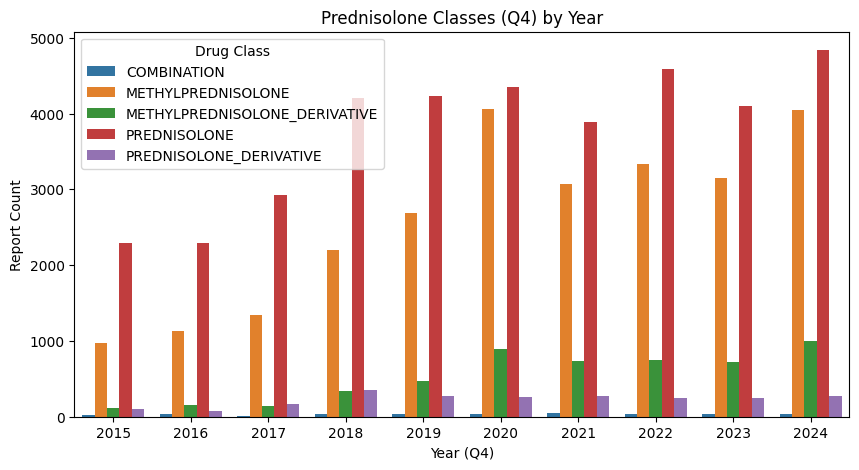

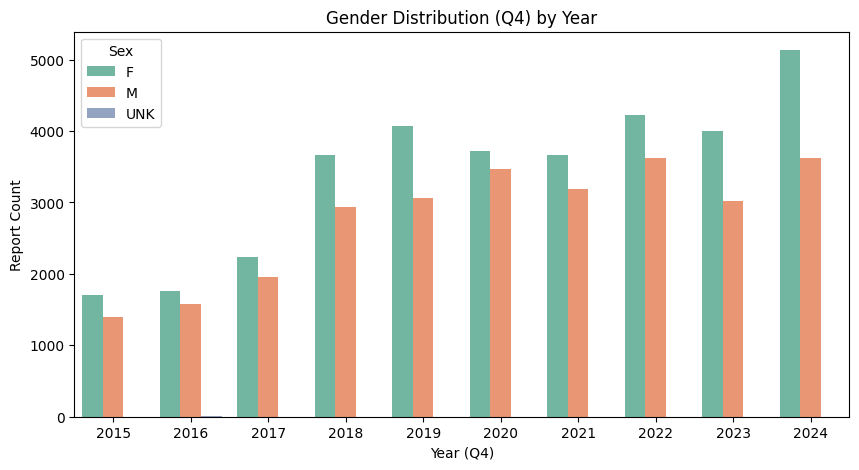

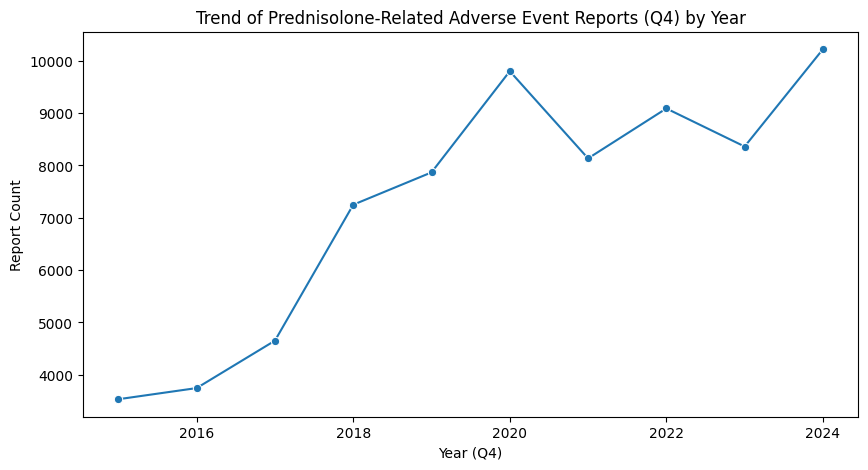

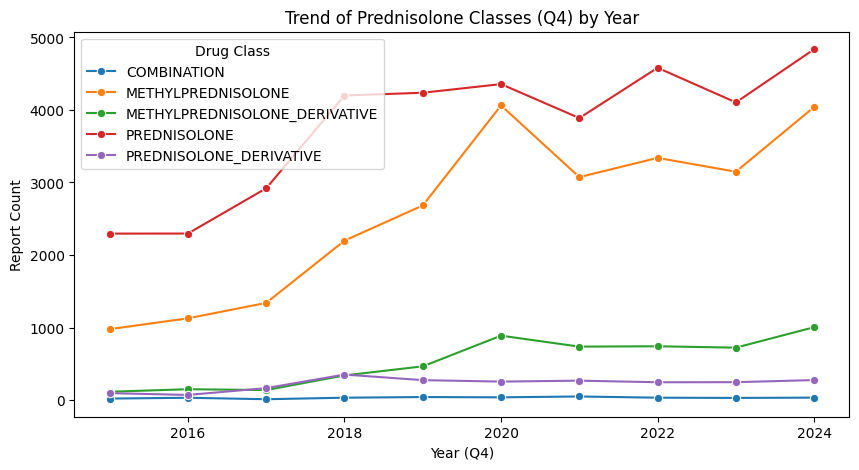

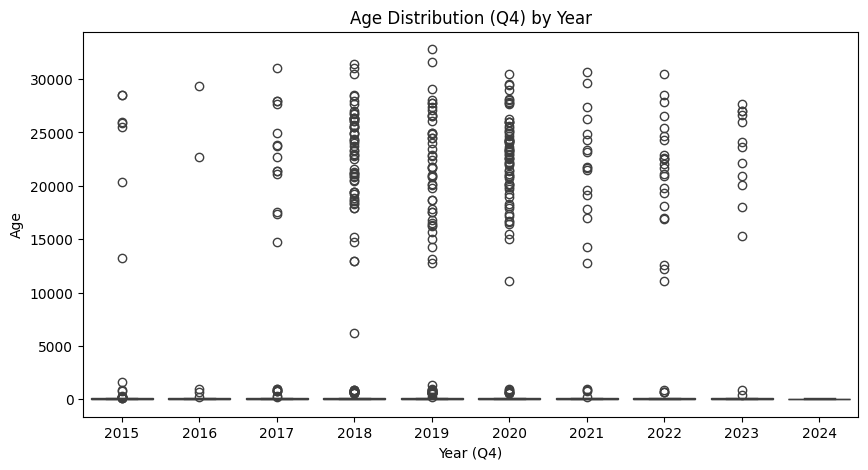

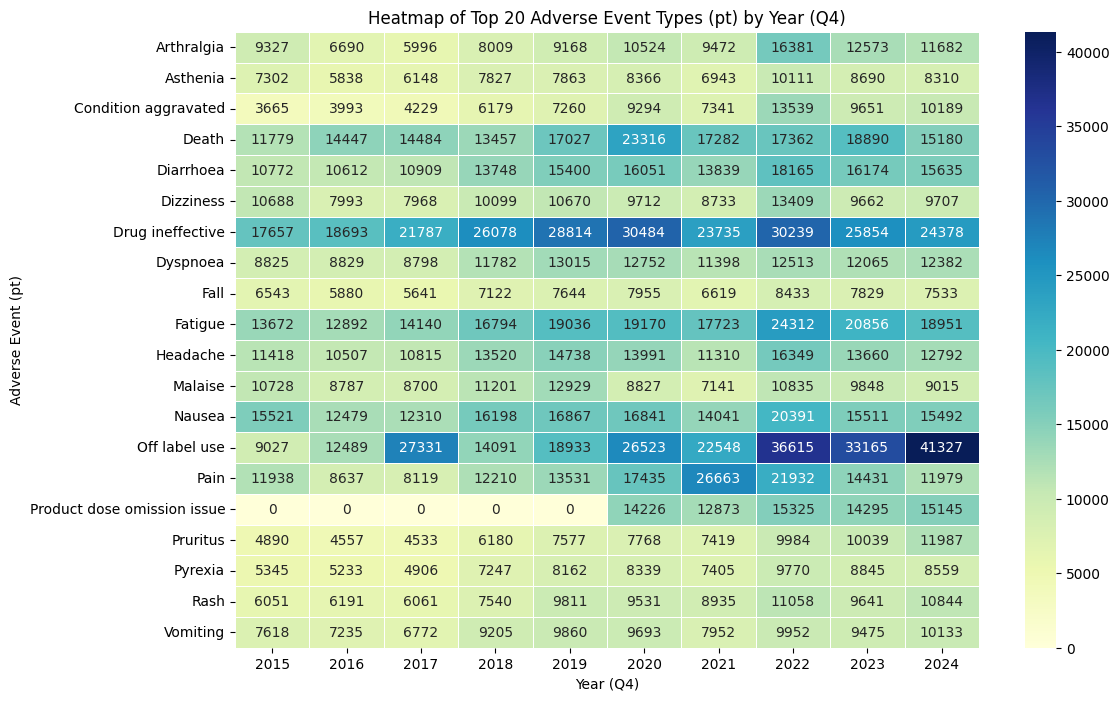

<ipython-input-6-6028be72f231>:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_age_pivot = exploded_df.groupby(['major_class_5cat', 'age_group']).size().reset_index(name='count')


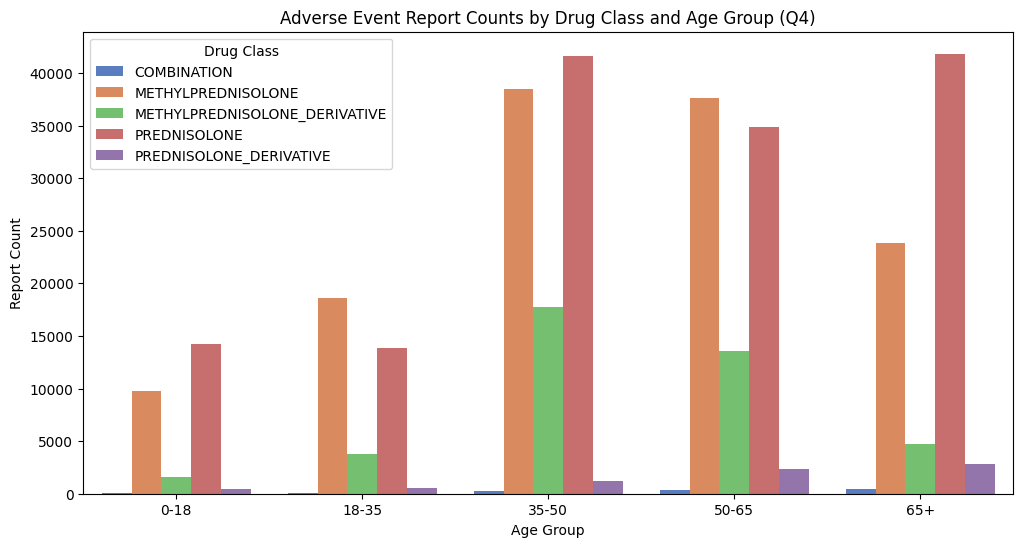

Visualizations for Q4 data (2020–2024) have been generated.


In [6]:
# -------------------------------
# 7. Visualization
# -------------------------------

# (a) Bar Plot: Total number of adverse event reports by year (Q4)
yearly_counts = final_one_row.groupby('year').size().reset_index(name='report_count')
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='report_count', data=yearly_counts, palette="Blues_d")
plt.title("Number of Prednisolone-Related Adverse Event Reports (Q4) by Year")
plt.xlabel("Year (Q4)")
plt.ylabel("Report Count")
plt.show()

# (b) Bar Plot: Distribution of the 5 drug classes across years (Q4)
class_year_counts = final_one_row.groupby(['year', 'major_class_5cat']).size().reset_index(name='count')
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='count', hue='major_class_5cat', data=class_year_counts)
plt.title("Prednisolone Classes (Q4) by Year")
plt.xlabel("Year (Q4)")
plt.ylabel("Report Count")
plt.legend(title="Drug Class")
plt.show()

# (c) Bar Plot: Gender distribution by year (Q4)
year_sex_counts = final_one_row.groupby(['year', 'sex']).size().reset_index(name='count')
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='count', hue='sex', data=year_sex_counts, palette="Set2")
plt.title("Gender Distribution (Q4) by Year")
plt.xlabel("Year (Q4)")
plt.ylabel("Report Count")
plt.legend(title="Sex")
plt.show()

# (d) Line Chart: Trend of total adverse event reports by year (Q4)
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='report_count', data=yearly_counts, marker="o", sort=True)
plt.title("Trend of Prednisolone-Related Adverse Event Reports (Q4) by Year")
plt.xlabel("Year (Q4)")
plt.ylabel("Report Count")
plt.show()

# (e) Line Chart: Trend of each drug class across years (Q4)
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='count', hue='major_class_5cat', data=class_year_counts, marker="o")
plt.title("Trend of Prednisolone Classes (Q4) by Year")
plt.xlabel("Year (Q4)")
plt.ylabel("Report Count")
plt.legend(title="Drug Class")
plt.show()

# (f) Boxplot: Age distribution by year (Q4)
plt.figure(figsize=(10, 5))
sns.boxplot(x='year', y='age', data=final_one_row)
plt.title("Age Distribution (Q4) by Year")
plt.xlabel("Year (Q4)")
plt.ylabel("Age")
plt.show()

# (g) Heatmap: Frequency of top 20 adverse event types (pt) by year (Q4)
reac_q4 = reac_df[(reac_df['year'].isin(years)) & (reac_df['quarter'] == quarter)]
top20_pt = reac_q4['pt'].value_counts().head(20).index.tolist()
filtered_reac = reac_q4[reac_q4['pt'].isin(top20_pt)]
pt_year_pivot = filtered_reac.pivot_table(index='pt', columns='year', values='primaryid', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pt_year_pivot, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)
plt.title("Heatmap of Top 20 Adverse Event Types (pt) by Year (Q4)")
plt.xlabel("Year (Q4)")
plt.ylabel("Adverse Event (pt)")
plt.show()

# (h) Additional: Bar Plot of adverse event counts by drug class and age group
# First, create a pivot table from exploded_df that aggregates counts by drug class and age group.
class_age_pivot = exploded_df.groupby(['major_class_5cat', 'age_group']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='count', hue='major_class_5cat', data=class_age_pivot, palette="muted")
plt.title("Adverse Event Report Counts by Drug Class and Age Group (Q4)")
plt.xlabel("Age Group")
plt.ylabel("Report Count")
plt.legend(title="Drug Class")
plt.show()

print("Visualizations for Q4 data (2020–2024) have been generated.")


<ipython-input-7-8e986b71dee3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_events.values, y=top_events.index, palette="viridis")


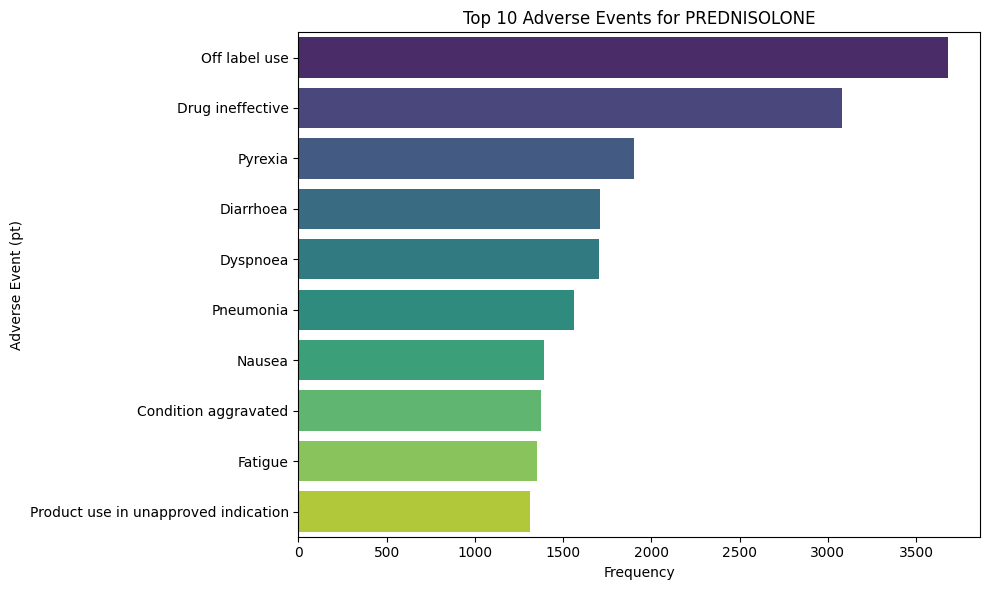

<ipython-input-7-8e986b71dee3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_events.values, y=top_events.index, palette="viridis")


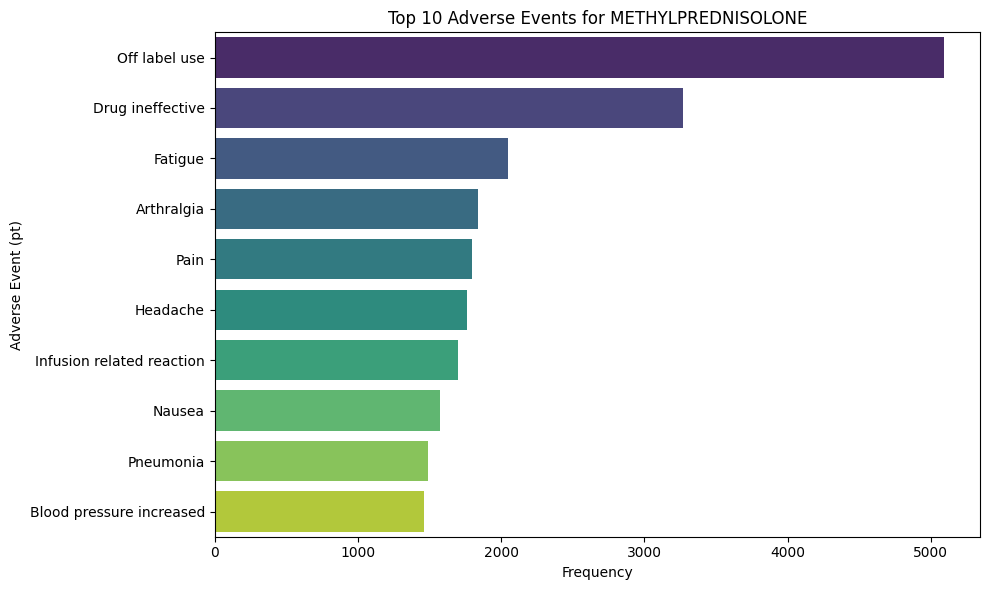

<ipython-input-7-8e986b71dee3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_events.values, y=top_events.index, palette="viridis")


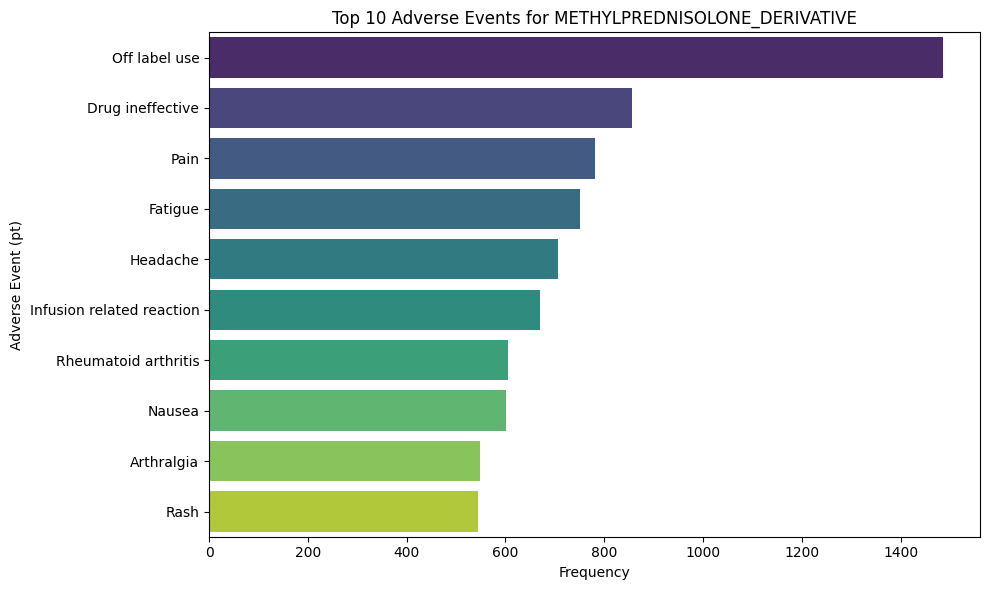

<ipython-input-7-8e986b71dee3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_events.values, y=top_events.index, palette="viridis")


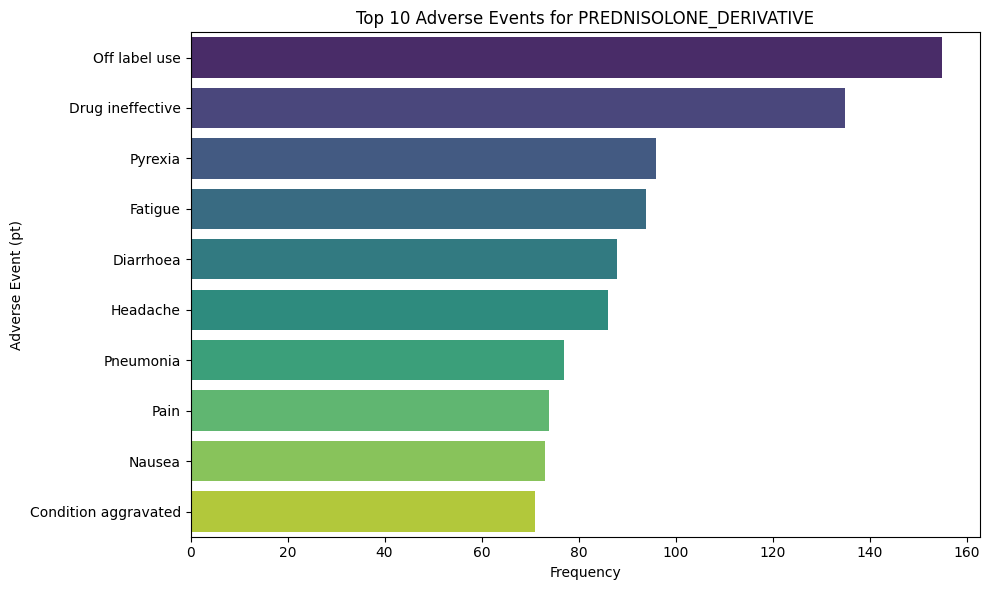

<ipython-input-7-8e986b71dee3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_events.values, y=top_events.index, palette="viridis")


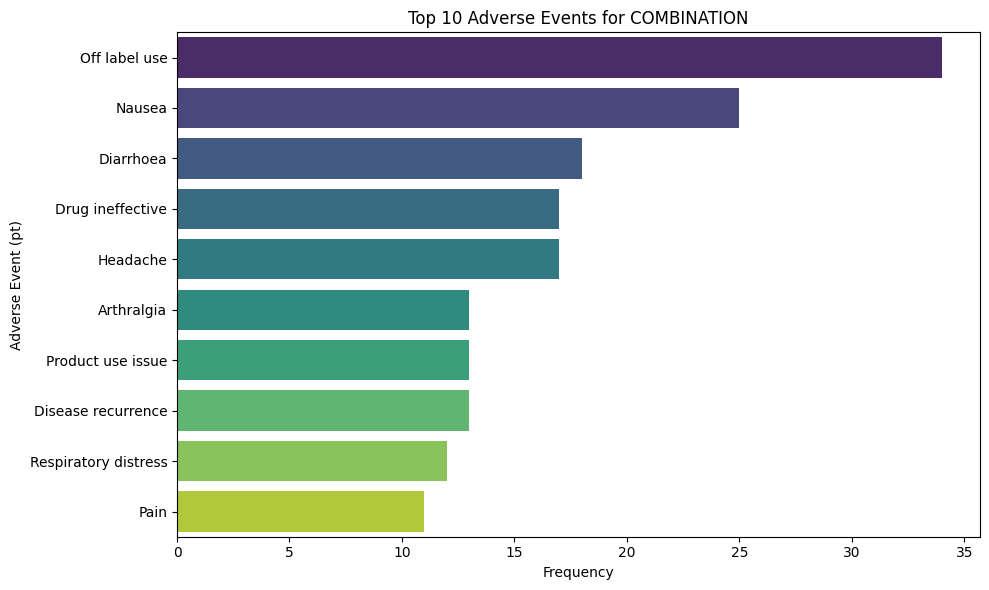

<ipython-input-7-8e986b71dee3>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='major_class_5cat', y='age', data=final_one_row, palette="Set3")


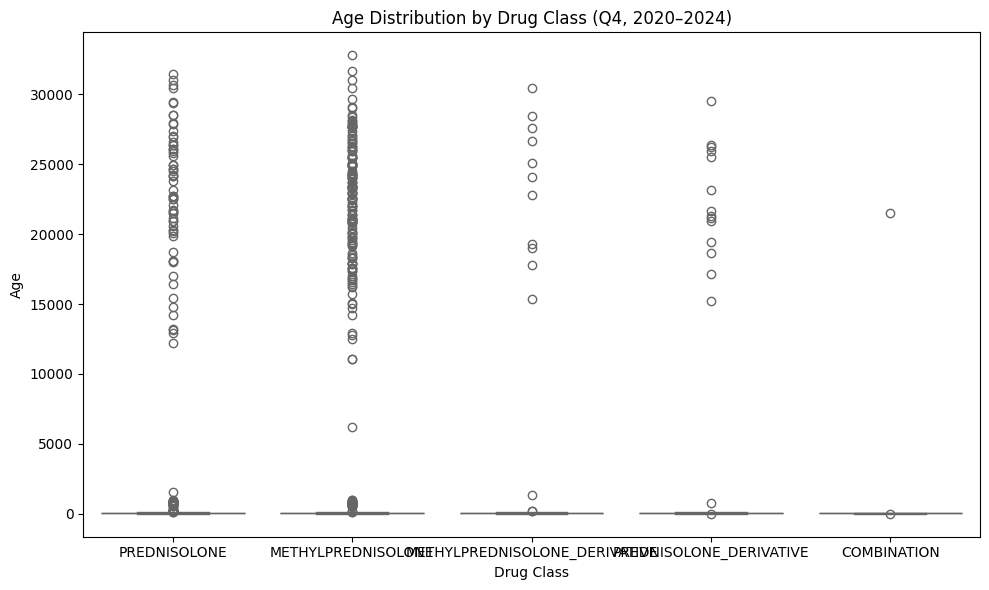

In [7]:
# Explode the aggregated 'pt' column into individual adverse events

# Create a new column 'pt_list' by splitting the 'pt' string
final_one_row['pt_list'] = final_one_row['pt'].str.split("; ")
# Explode the list so that each adverse event is in a separate row
exploded_df = final_one_row.explode('pt_list')

# Visualization: Top common adverse events by drug class
# Get the unique drug classes (drop any NaN)
drug_classes = final_one_row['major_class_5cat'].dropna().unique()

# For each drug class, compute the top 10 most common adverse events and plot a bar chart
for drug_class in drug_classes:
    df_temp = exploded_df[exploded_df['major_class_5cat'] == drug_class]
    top_events = df_temp['pt_list'].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_events.values, y=top_events.index, palette="viridis")
    plt.title(f"Top 10 Adverse Events for {drug_class}")
    plt.xlabel("Frequency")
    plt.ylabel("Adverse Event (pt)")
    plt.tight_layout()
    plt.show()

# Visualization: Age distribution by drug class
plt.figure(figsize=(10, 6))
sns.boxplot(x='major_class_5cat', y='age', data=final_one_row, palette="Set3")
plt.title("Age Distribution by Drug Class (Q4, 2020–2024)")
plt.xlabel("Drug Class")
plt.ylabel("Age")
plt.tight_layout()
plt.show()


Total unique adverse event terms: 8832
Cluster 0: ['Platelet count decreased', 'White blood cell count decreased', 'Blood pressure decreased', 'Blood pressure diastolic decreased', 'Heart rate decreased']
Cluster 1: ['Gastric mucosal hypertrophy', 'Muscle hypertrophy', 'Cardiac septal hypertrophy', 'Cardiac hypertrophy', 'Gingival hypertrophy']
Cluster 2: ['Septic shock', 'Viral haemorrhagic cystitis', 'Haemorrhagic diathesis', 'Shock haemorrhagic', 'Toxic shock syndrome']
Cluster 3: ['Blindness', 'Deafness', 'Demyelination', 'Disorientation', 'Faecal incontinence']
Cluster 4: ['Cytomegalovirus infection', 'JC virus infection', 'Upper respiratory tract infection', 'Fungal infection', 'Urinary tract infection']
Cluster 5: ['Acute graft versus host disease', 'Portal vein thrombosis', 'Deep vein thrombosis', 'Thrombosis', 'Deep vein thrombosis postoperative']
Cluster 6: ['Gastrointestinal disorder', 'Cognitive disorder', 'Mental disorder', 'Renal disorder', 'Tonsillar disorder']
Cluster 7

<ipython-input-8-6f09cd3f383e>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


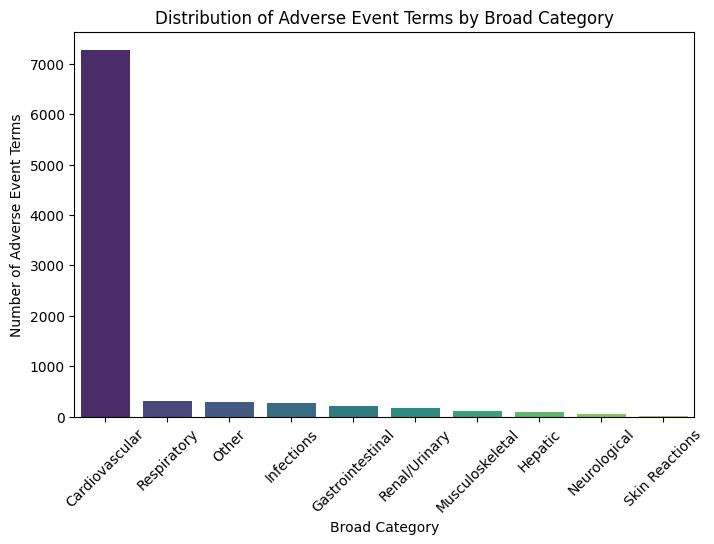

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Extract all unique adverse event terms from the exploded column in exploded_df.
# Assume exploded_df is already created from your aggregated data and contains a column 'pt_list',
# where each row corresponds to a single adverse event term.
unique_pt_terms = exploded_df['pt_list'].dropna().unique()
unique_pt_terms = list(unique_pt_terms)
print(f"Total unique adverse event terms: {len(unique_pt_terms)}")

# Vectorize the adverse event terms using TF-IDF.
vectorizer = TfidfVectorizer(stop_words='english')
X_pt = vectorizer.fit_transform(unique_pt_terms)

# Use K-Means clustering to group the terms into 10 clusters.
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pt)
clusters = kmeans.labels_

# Create a DataFrame mapping each adverse event term to its assigned cluster.
pt_clusters = pd.DataFrame({'pt_term': unique_pt_terms, 'cluster': clusters})

# OPTIONAL: Print the top 5 terms for each cluster for inspection.
for i in range(num_clusters):
    terms = pt_clusters[pt_clusters['cluster'] == i]['pt_term'].head(5).tolist()
    print(f"Cluster {i}: {terms}")

# Manually define a mapping from cluster id to broad category names.
# (Adjust these names based on your domain expertise.)
cluster_labels = {
    0: "Gastrointestinal",
    1: "Skin Reactions",
    2: "Neurological",
    3: "Cardiovascular",
    4: "Respiratory",
    5: "Musculoskeletal",
    6: "Infections",
    7: "Renal/Urinary",
    8: "Hepatic",
    9: "Other"
}

pt_clusters['broad_category'] = pt_clusters['cluster'].map(cluster_labels)
print("Adverse event terms with assigned clusters and broad categories:")
print(pt_clusters.sort_values('cluster').head(20))

# Merge the broad category mapping back into the main exploded DataFrame.
# We match the 'pt_list' from exploded_df with 'pt_term' in pt_clusters.
exploded_df = exploded_df.merge(pt_clusters[['pt_term', 'broad_category']],
                                left_on='pt_list', right_on='pt_term', how='left')
# Optionally, drop the redundant column 'pt_term'
exploded_df.drop(columns=['pt_term'], inplace=True)
print("Updated exploded_df with 'broad_category':")
print(exploded_df.head(10))

# Use the pt_clusters DataFrame for an overall cluster count.
# Step: Count number of pt_terms per broad category
cluster_counts = pt_clusters['broad_category'].value_counts()
# Map numeric cluster indices to broad category names using the cluster_labels dictionary
cluster_counts.index = cluster_counts.index.map(lambda x: cluster_labels.get(x, str(x)))

plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.xlabel("Broad Category")
plt.ylabel("Number of Adverse Event Terms")
plt.title("Distribution of Adverse Event Terms by Broad Category")
plt.xticks(rotation=45)
plt.show()



In [9]:
# Save final processed data to a CSV file on Google Drive
csv_path = "/content/drive/My Drive/final_processed_data.csv"
final_one_row.to_csv(csv_path, index=False)
print(f"Final processed data has been saved to {csv_path}")


Final processed data has been saved to /content/drive/My Drive/final_processed_data.csv


In [10]:
final_one_row

,year,quarter,caseid,age,sex,drugname_clean,major_class_5cat,pt,indi_pt,dechal,rechal,age_group,pt_list
0,2015,Q4,6613507,58.0,M,PREDNISOLONE.,PREDNISOLONE,Blindness; Cytomegalovirus infection; Deafness...,Bone marrow conditioning regimen; Chronic lymp...,None,None,50-65,"[Blindness, Cytomegalovirus infection, Deafnes..."
1,2015,Q4,6700674,28.0,M,METHYLPREDNISOLONE.,METHYLPREDNISOLONE,Anosmia; Arthralgia; Benign intracranial hyper...,Chronic myeloid leukaemia; Product used for un...,None,None,18-35,"[Anosmia, Arthralgia, Benign intracranial hype..."
2,2015,Q4,7166815,53.0,M,METHYLPREDNISOLONE ACETATE.,METHYLPREDNISOLONE_DERIVATIVE,Diarrhoea; Febrile bone marrow aplasia; Fungal...,Acute lymphocytic leukaemia; Product used for ...,None,None,50-65,"[Diarrhoea, Febrile bone marrow aplasia, Funga..."
3,2015,Q4,7246767,42.0,F,PREDNISOLONE.,PREDNISOLONE,Alanine aminotransferase abnormal; Alanine ami...,Antiviral prophylaxis; Gestational diabetes; H...,None,None,35-50,"[Alanine aminotransferase abnormal, Alanine am..."
4,2015,Q4,7317887,40.0,F,METHYLPREDNISOLONE.,METHYLPREDNISOLONE,Acute coronary syndrome; Angina unstable; Ches...,Product used for unknown indication,None,None,35-50,"[Acute coronary syndrome, Angina unstable, Che..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72655,2024,Q4,24795336,67.0,M,PREDNISOLONE,PREDNISOLONE,Cough; Cytomegalovirus infection reactivation;...,Product used for unknown indication,U,None,65+,"[Cough, Cytomegalovirus infection reactivation..."
72656,2024,Q4,24795452,40.0,F,METHYLPREDNISOLONE,METHYLPREDNISOLONE,Abdominal discomfort; Abdominal distension; Ab...,Migraine; Product used for unknown indication;...,U,None,35-50,"[Abdominal discomfort, Abdominal distension, A..."
72657,2024,Q4,24795481,40.0,F,METHYLPREDNISOLONE SODIUM SUCCINATE,METHYLPREDNISOLONE_DERIVATIVE,C-reactive protein abnormal; C-reactive protei...,Migraine; Product used for unknown indication;...,D,None,35-50,"[C-reactive protein abnormal, C-reactive prote..."
72658,2024,Q4,24795517,84.0,M,PREDNISOLONE,PREDNISOLONE,Off label use; Pulmonary embolism,Immune thrombocytopenia,None,None,65+,"[Off label use, Pulmonary embolism]"


In [11]:

# Reconstruct exploded_df if not already available
final_one_row['pt_list'] = final_one_row['pt'].str.split("; ")
exploded_df = final_one_row.explode('pt_list')
exploded_df = exploded_df[~exploded_df['pt_list'].isna()]


In [12]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Extract unique adverse events
unique_pt_terms = exploded_df['pt_list'].dropna().unique().tolist()

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', min_df=1)
X_pt = vectorizer.fit_transform(unique_pt_terms)

# PCA for 2D Visualization
pca = PCA(n_components=2)
X_pt_pca = pca.fit_transform(X_pt.toarray())

# KMeans Clustering
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(X_pt)
clusters = kmeans.labels_

# Create DataFrame
pt_clusters = pd.DataFrame({
    'pt_term': unique_pt_terms,
    'cluster': clusters,
    'PC1': X_pt_pca[:, 0],
    'PC2': X_pt_pca[:, 1]
})


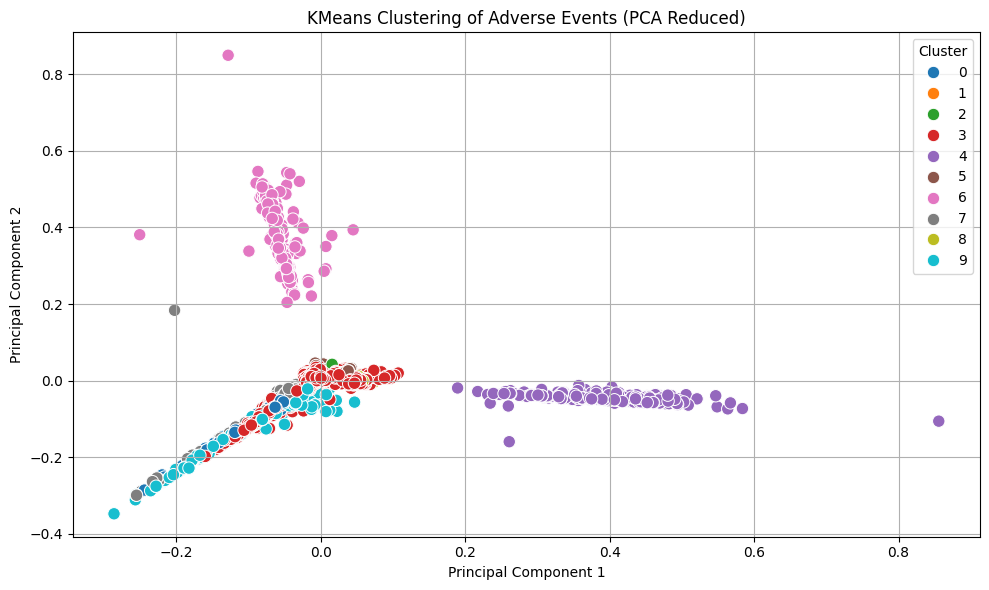

   cluster                                      example_terms
0        0  Platelet count decreased, White blood cell cou...
1        1  Gastric mucosal hypertrophy, Muscle hypertroph...
2        2  Septic shock, Viral haemorrhagic cystitis, Hae...
3        3  Blindness, Deafness, Demyelination, Disorienta...
4        4  Cytomegalovirus infection, JC virus infection,...
5        5  Acute graft versus host disease, Portal vein t...
6        6  Gastrointestinal disorder, Cognitive disorder,...
7        7  White blood cell count increased, Lymphoma, No...
8        8  Abscess limb, Tooth abscess, Abscess, Brain ab...
9        9  Blood blister, Blood cholesterol increased, Bl...


In [13]:

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pt_clusters, x='PC1', y='PC2', hue='cluster', palette='tab10', s=80)
plt.title("KMeans Clustering of Adverse Events (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# Show examples
cluster_sample = pt_clusters.groupby('cluster')['pt_term'].apply(lambda x: ', '.join(x.head(5))).reset_index()
cluster_sample.columns = ['cluster', 'example_terms']
print(cluster_sample)


In [14]:

# Define corrected cluster labels based on observed keywords
correction_map = {
    0: "Gastrointestinal",
    1: "Skin Reactions",
    2: "Neurological",
    3: "Cardiovascular",
    4: "Respiratory",
    5: "Musculoskeletal",
    6: "Infections",
    7: "Renal/Urinary",
    8: "Hepatic",
    9: "Other"
}

# Apply correction map
pt_clusters['broad_category'] = pt_clusters['cluster'].map(correction_map)

# Merge back into exploded_df
exploded_df = exploded_df.merge(pt_clusters[['pt_term', 'broad_category']],
                                left_on='pt_list', right_on='pt_term', how='left')

# Clean up
exploded_df.drop(columns=['pt_term'], inplace=True, errors='ignore')

# Safe preview to verify success
print("Preview of classified adverse event terms:")
print(exploded_df[['pt_list', 'broad_category']].dropna().head(10))


Preview of classified adverse event terms:
                     pt_list  broad_category
0                  Blindness  Cardiovascular
1  Cytomegalovirus infection     Respiratory
2                   Deafness  Cardiovascular
3              Demyelination  Cardiovascular
4             Disorientation  Cardiovascular
5        Faecal incontinence  Cardiovascular
6      Hemianopia homonymous  Cardiovascular
7          Immunosuppression  Cardiovascular
8         JC virus infection     Respiratory
9               Mood altered  Cardiovascular


In [15]:

# Define black/red line terms
black_terms = ['drug ineffective']
red_terms = ['fatigue', 'pain']

# Generate date column
quarter_to_month = {'Q1': '03-31', 'Q2': '06-30', 'Q3': '09-30', 'Q4': '12-31'}
exploded_df['quarter_end'] = exploded_df['quarter'].map(quarter_to_month)
exploded_df['report_date'] = pd.to_datetime(exploded_df['year'].astype(str) + '-' + exploded_df['quarter_end'])

# Event Group 1
exploded_df['event_group'] = exploded_df['pt_list'].apply(
    lambda x: 'Drug Ineffective' if x in black_terms else ('Clinical Symptoms' if x in red_terms else None)
)


<ipython-input-16-326d7a52a013>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-16-326d7a52a013>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


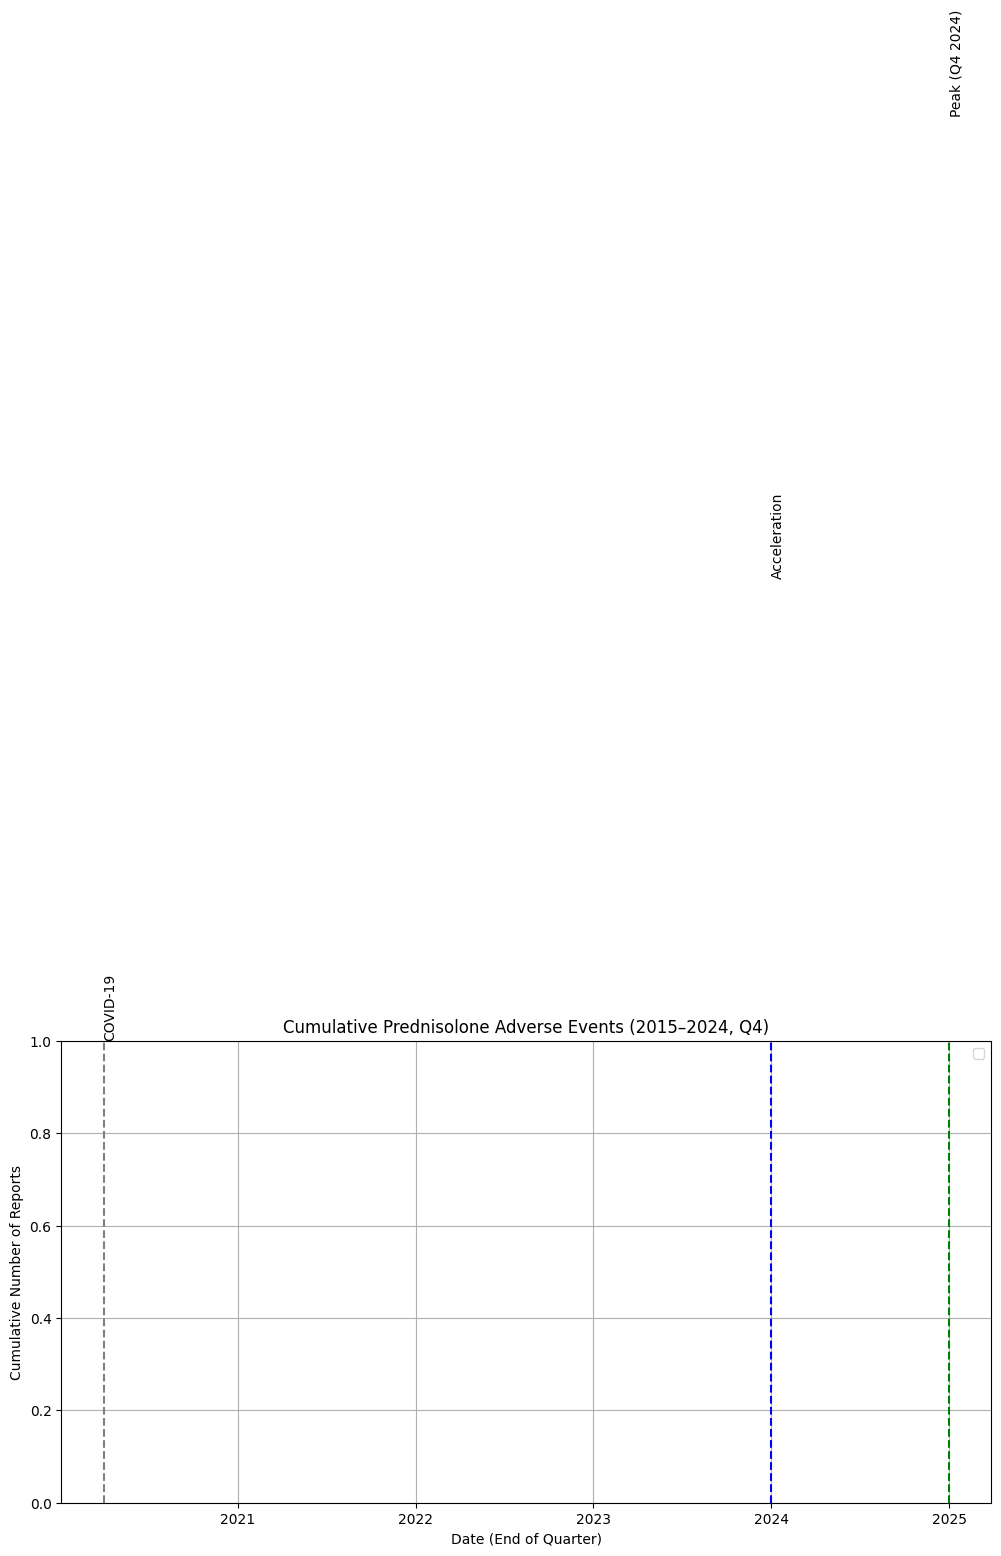

In [16]:

filtered_df = exploded_df[exploded_df['event_group'].notna()]
grouped = filtered_df.groupby(['report_date', 'event_group']).size().reset_index(name='count')
pivoted = grouped.pivot(index='report_date', columns='event_group', values='count').fillna(0)
pivoted_cumsum = pivoted.cumsum()

plt.figure(figsize=(12, 6))
if 'Drug Ineffective' in pivoted_cumsum.columns:
    plt.plot(pivoted_cumsum.index, pivoted_cumsum['Drug Ineffective'], label='Drug Ineffective', color='black', linewidth=2)
if 'Clinical Symptoms' in pivoted_cumsum.columns:
    plt.plot(pivoted_cumsum.index, pivoted_cumsum['Clinical Symptoms'], label='Fatigue + Pain', color='red', linewidth=2)

# Markers
plt.axvline(pd.to_datetime('2020-03-31'), linestyle='--', color='gray')
plt.text(pd.to_datetime('2020-03-31'), 1, 'COVID-19', rotation=90, verticalalignment='bottom')

plt.axvline(pd.to_datetime('2023-12-31'), linestyle='--', color='blue')
plt.text(pd.to_datetime('2023-12-31'), 2, 'Acceleration', rotation=90, verticalalignment='bottom')

plt.axvline(pd.to_datetime('2024-12-31'), linestyle='--', color='green')
plt.text(pd.to_datetime('2024-12-31'), 3, 'Peak (Q4 2024)', rotation=90, verticalalignment='bottom')

plt.title("Cumulative Prednisolone Adverse Events (2015–2024, Q4)")
plt.xlabel("Date (End of Quarter)")
plt.ylabel("Cumulative Number of Reports")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [17]:

# Normalize pt_list to lowercase for reliable matching
exploded_df['pt_list_lower'] = exploded_df['pt_list'].str.lower()

# Define event group classification using lowercase matching
black_terms_alt = ['off label use']
red_terms_alt = ['syncope', 'asystole', 'cardiac arrest']

exploded_df['event_group'] = exploded_df['pt_list_lower'].apply(
    lambda x: 'Off Label Use' if x in black_terms_alt else (
        'Serious Clinical Events' if x in red_terms_alt else None)
)


<ipython-input-18-3b87b2c1d6e3>:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-18-3b87b2c1d6e3>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


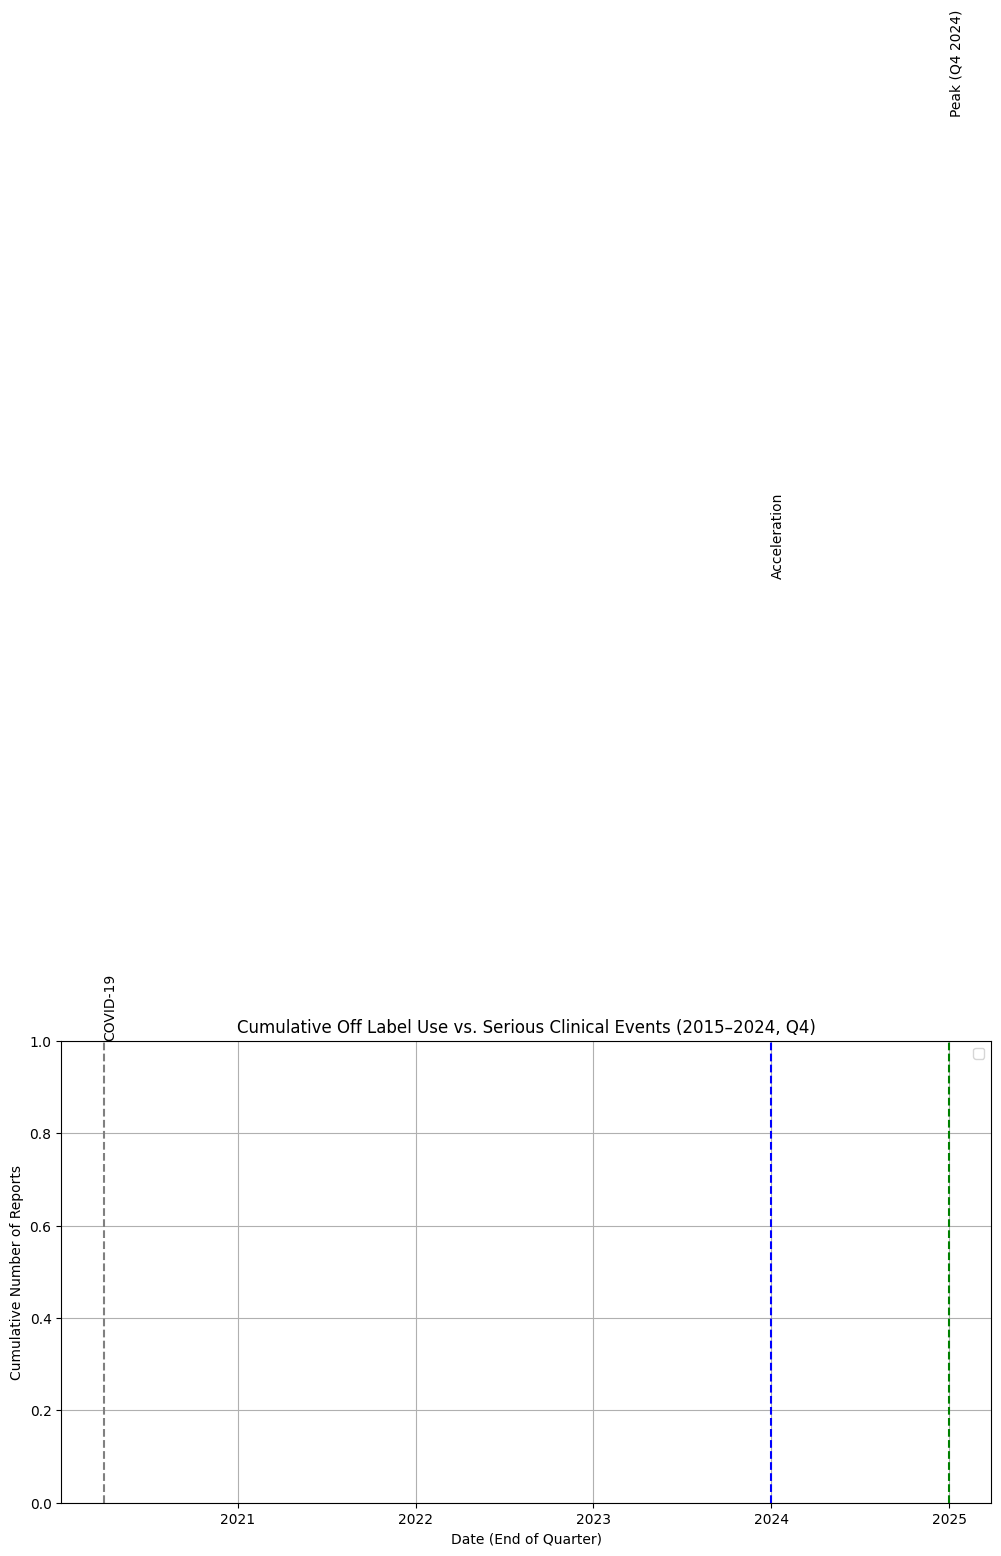

In [18]:

# Redefine event group
black_terms_alt = ['off label use']
red_terms_alt = ['syncope', 'asystole', 'cardiac arrest']
exploded_df['event_group'] = exploded_df['pt_list'].apply(
    lambda x: 'Off Label Use' if x in black_terms_alt else ('Serious Clinical Events' if x in red_terms_alt else None)
)

filtered_alt = exploded_df[exploded_df['event_group'].notna()]
grouped_alt = filtered_alt.groupby(['report_date', 'event_group']).size().reset_index(name='count')
pivoted_alt = grouped_alt.pivot(index='report_date', columns='event_group', values='count').fillna(0)
pivoted_alt_cumsum = pivoted_alt.cumsum()

plt.figure(figsize=(12, 6))
if 'Off Label Use' in pivoted_alt_cumsum.columns:
    plt.plot(pivoted_alt_cumsum.index, pivoted_alt_cumsum['Off Label Use'], label='Off Label Use', color='black', linewidth=2)
if 'Serious Clinical Events' in pivoted_alt_cumsum.columns:
    plt.plot(pivoted_alt_cumsum.index, pivoted_alt_cumsum['Serious Clinical Events'], label='Syncope + Asystole + Arrest', color='red', linewidth=2)

# Annotations
plt.axvline(pd.to_datetime('2020-03-31'), linestyle='--', color='gray')
plt.text(pd.to_datetime('2020-03-31'), 1, 'COVID-19', rotation=90, verticalalignment='bottom')

plt.axvline(pd.to_datetime('2023-12-31'), linestyle='--', color='blue')
plt.text(pd.to_datetime('2023-12-31'), 2, 'Acceleration', rotation=90, verticalalignment='bottom')

plt.axvline(pd.to_datetime('2024-12-31'), linestyle='--', color='green')
plt.text(pd.to_datetime('2024-12-31'), 3, 'Peak (Q4 2024)', rotation=90, verticalalignment='bottom')

plt.title("Cumulative Off Label Use vs. Serious Clinical Events (2015–2024, Q4)")
plt.xlabel("Date (End of Quarter)")
plt.ylabel("Cumulative Number of Reports")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


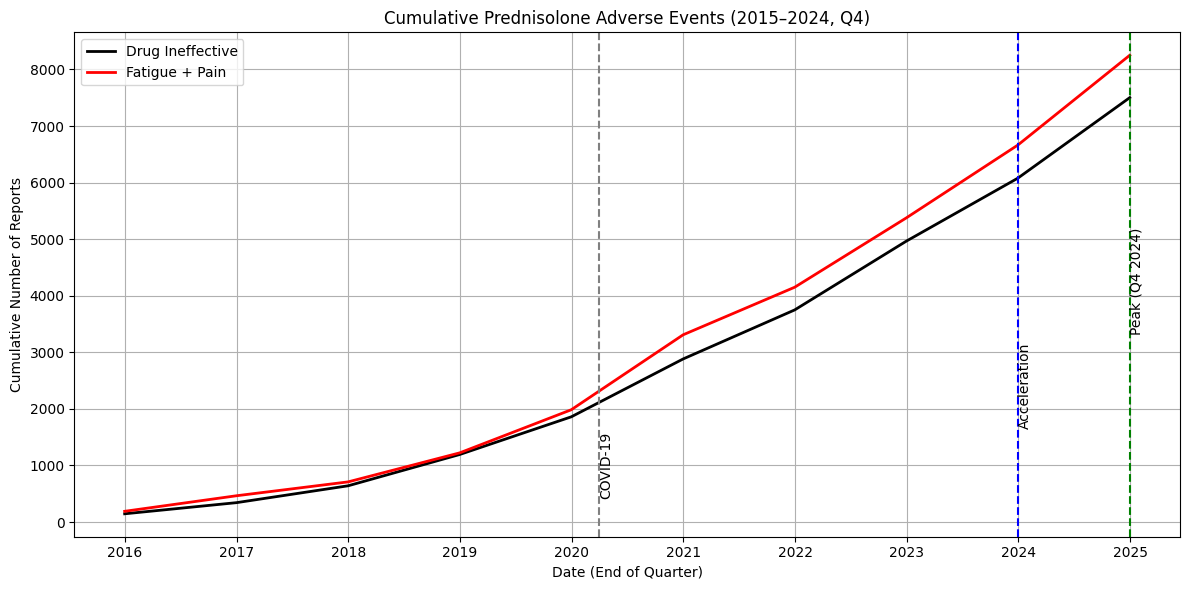

In [19]:
# Ensure pt_list is clean and lowercased
exploded_df = exploded_df.copy()
exploded_df = exploded_df[~exploded_df['pt_list'].isna()]
exploded_df['pt_list_lower'] = exploded_df['pt_list'].str.lower()

# Rebuild report_date
quarter_to_month = {'Q1': '03-31', 'Q2': '06-30', 'Q3': '09-30', 'Q4': '12-31'}
exploded_df['report_date'] = pd.to_datetime(
    exploded_df['year'].astype(str) + '-' + exploded_df['quarter'].map(quarter_to_month))

# Define categories
black_terms = ['drug ineffective']
red_terms = ['fatigue', 'pain']

exploded_df['event_group'] = exploded_df['pt_list_lower'].apply(
    lambda x: 'Drug Ineffective' if x in black_terms else ('Clinical Symptoms' if x in red_terms else None)
)

# Filter + group + pivot
filtered_df = exploded_df[exploded_df['event_group'].notna()]
grouped = filtered_df.groupby(['report_date', 'event_group']).size().reset_index(name='count')
pivoted = grouped.pivot(index='report_date', columns='event_group', values='count').fillna(0)
pivoted_cumsum = pivoted.cumsum()


plt.figure(figsize=(12, 6))

# Draw lines only if data exists
if 'Drug Ineffective' in pivoted_cumsum.columns:
    plt.plot(pivoted_cumsum.index, pivoted_cumsum['Drug Ineffective'], label='Drug Ineffective', color='black', linewidth=2)

if 'Clinical Symptoms' in pivoted_cumsum.columns:
    plt.plot(pivoted_cumsum.index, pivoted_cumsum['Clinical Symptoms'], label='Fatigue + Pain', color='red', linewidth=2)

# Add reference markers
plt.axvline(pd.to_datetime('2020-03-31'), linestyle='--', color='gray')
plt.text(pd.to_datetime('2020-03-31'), pivoted_cumsum.max().max()*0.05, 'COVID-19', rotation=90, verticalalignment='bottom')

plt.axvline(pd.to_datetime('2023-12-31'), linestyle='--', color='blue')
plt.text(pd.to_datetime('2023-12-31'), pivoted_cumsum.max().max()*0.2, 'Acceleration', rotation=90, verticalalignment='bottom')

plt.axvline(pd.to_datetime('2024-12-31'), linestyle='--', color='green')
plt.text(pd.to_datetime('2024-12-31'), pivoted_cumsum.max().max()*0.4, 'Peak (Q4 2024)', rotation=90, verticalalignment='bottom')

# Finalize plot
plt.title("Cumulative Prednisolone Adverse Events (2015–2024, Q4)")
plt.xlabel("Date (End of Quarter)")
plt.ylabel("Cumulative Number of Reports")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()